# <center> Dimensional Causality </center>

### <center>- $\textit{Causality detection via fractal formalism}$  - </center>


###### <center> Kristóf Furuglyás, Eötvös Loránd University </center>
###### <center> Theoretical Physics Seminar, 2019 Fall </center>
---

<p>
    <img src="pics/elte_cimer_szines.jpg" alt="elte_log" align="left" width = 300/>
    <img src="pics/wigner_emblem.png" alt="wigner_log" align="right" width = 300 />
</p>






# <center> Table of contents </center>

<img style="float: right;" src="pics/a_b.png" alt = "intro" width = 380>


- Introduction -- Types of connections
- Overall view of basic connections
- Granger Causality
- Cross-convergent mapping (CCM)
- Dimensional causality
- Summary

<br>
<br>

----
<p style="font-size:80%;" align> $\textit{Kristóf Furuglyás, Theoretical Physics Seminar, 2019 Fall }$ </p>


# <center> About Causality </center>

<img style="float: right;" src="pics/causality_types.png" alt = "caus" width = 200>


* Having two discrete time series $X$ and $Y$
* One would like to infer the relation between them
* Types of connections:
     - Independent $X \perp Y$ 
     - Unidirectional $X\rightarrow Y$ or $X\leftarrow Y$
     - Bidirectional $X \leftrightarrows Y$ 
     - (Hidden) Common cause $X \Lsh  \Rsh  Y $ 
* Last not explored yet totally

<br>
<br>

----
<p style="font-size:80%;"> $\textit{Kristóf Furuglyás, Theoretical Physics Seminar, 2019 Fall }$ </p>



# <center> Taxonomy of connectivity </center>

<center><img  src="pics/taxonomy_bastos.jpg" alt = "tax" width = 350></center>

<center><b> Ref: André M. Bastos et al., 2016 </b></center>

<br>

----
<p style="font-size:80%;" align = "bottom"> $\textit{Kristóf Furuglyás, Theoretical Physics Seminar, 2019 Fall }$ </p>


In [1]:
%pylab inline

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/kfuruglyas/.local/lib/python2.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [28]:
from scipy.stats import pearsonr, entropy
from scipy.signal import correlate, coherence
import scipy.signal as signal
from __future__ import print_function
from sklearn.feature_selection.mutual_info_ import mutual_info_score
import os.path
from mne import connectivity

SyntaxError: invalid syntax (config.py, line 541)

In [4]:
 Fs, f = 8000, 5
x = np.arange(Fs)
A = np.sin(2 * np.pi * f * x / Fs)
B = np.sin(2 * np.pi * f * x / Fs+ pi/6)
C = np.sin(2 * np.pi * f * x / Fs+ pi/2)
D = [0.1 for i in x]
x = np.linspace(0,1,Fs)

In [5]:
def entropy1(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

#### <center> Examples </center>

In [6]:
figsize(10,6)

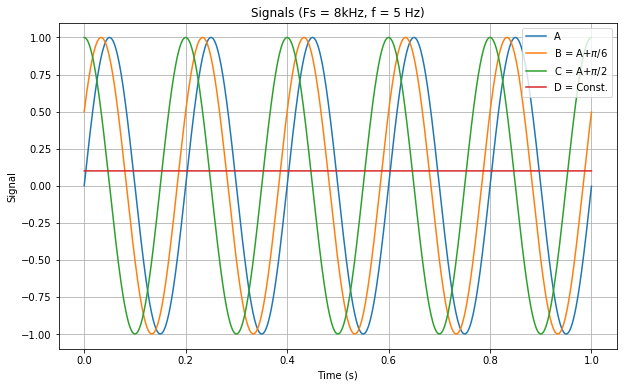

In [7]:
plots, labels = array([A, B, C, D]), ["A", "B = A+$\pi/6$", "C = A+$\pi/2$","D = Const."]
plt.title("Signals (Fs = 8kHz, f = 5 Hz)")
plt.plot(x, plots.T)
plt.grid()
plt.legend(labels, loc = 'best')
plt.xlabel('Time (s)')
plt.ylabel('Signal');

####  <center> Simpler connections in time domain </center>
- Pearson correlation (non-directed, model-based):
$$
r_{xy}=\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}
    $$
    

In [8]:
print("Pearson correlation| A-B:", round(pearsonr(A,B)[0],4), "A-C:",
      round(pearsonr(A,C)[0],4), "A-D:", round(pearsonr(A,D)[0],4))

Pearson correlation| A-B: 0.866 A-C: 0.0 A-D: 0.0


- Mutual information (non-directed, model-free):
$$
I(X;Y) = \sum_{x,y} P_{XY}(x,y) \log
{P_{XY}(x,y) \over P_X(x) P_Y(y)}
= E_{P_{XY}} \log{P_{XY} \over P_X P_Y}
$$

In [9]:
print("The entropies|       A: ", round(entropy1(A),4), " B: ",
      round(entropy1(B),4), " C: ", round(entropy1(C),4), " D: ", round(entropy1(D),4))
print("Mutual information| A-B:", round(mutual_info_score(A, B),4), "A-C:",
      round(mutual_info_score(A,C),4), "A-D:", round(mutual_info_score(A,D),4))
print("As a reference|     A-A:", round(mutual_info_score(A,A),4), "B-B:",
      round(mutual_info_score(B,B),4), "C-C:", round(mutual_info_score(C,C),4))


The entropies|       A:  8.7128  B:  8.8416  C:  8.7617  D:  0.0
Mutual information| A-B: 8.5825 A-C: 8.4901 A-D: 0.0
As a reference|     A-A: 8.7128 B-B: 8.8416 C-C: 8.7617


- Cross correlation (directed, model-based):
    
$$
(f\star g)[n] =\sum _{m=-\infty }^{\infty }{f[m]^*}g[m+n]
$$

In [19]:
figsize(8,5)

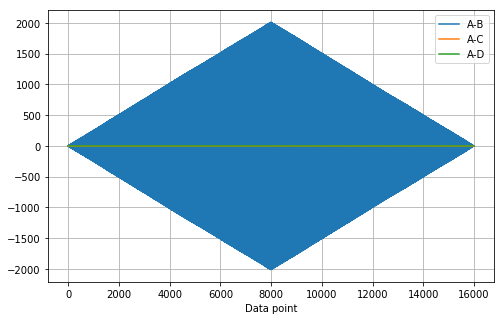

In [20]:
grid()
plot(correlate(A,B))
plot(correlate(A,C))
plot(correlate(A,D))
legend(["A-B", "A-C", "A-D" ], loc = 'best')
xlabel('Data point');

- Transfer entropy (directed, model-free):

$$
T_{J \rightarrow I}(k,l) = \sum_{i,j} p\left(i_{t+1}, i_t^{(k)}, j_t^{(l)}\right) \cdot log \left(\frac{p\left(i_{t+1}| i_t^{(k)}, j_t^{(l)}\right)}{p\left(i_{t+1}|i_t^{(k)}\right)}\right),
$$

# <center> Transfer Entropy </center>

<center><img  src="pics/transfer_entropy.png" alt = "tra_ent" width = 500></center>

<center><b> Ref: Lee, Uncheol et al., 2013 </b></center>

----
<p style="font-size:80%;" align = "bottom"> $\textit{Kristóf Furuglyás, Theoretical Physics Seminar, 2019 Fall }$ </p>

# <center> Frequency domain </center>

- Coherence
$$
 \gamma _{xy}^{2}(f)={\frac {|S_{xy}(f)|^{2}}{S_{xx}(f)S_{yy}(f)}}
$$


In [21]:
Fs, f1, f2 = 8000, 1000, 1500
x = np.arange(Fs)
A = np.sin(2 * np.pi * f1 * x / Fs)
B = A + np.sin(2 * np.pi * f2 * x / Fs+ pi/6)
B = B/2
x = np.linspace(0,1,Fs)
noise_power = 0.001 * Fs / 2
B = B+ np.random.normal(scale=0.1*np.sqrt(noise_power), size=Fs)

In [22]:
f, c = coherence(A,B, fs = Fs )

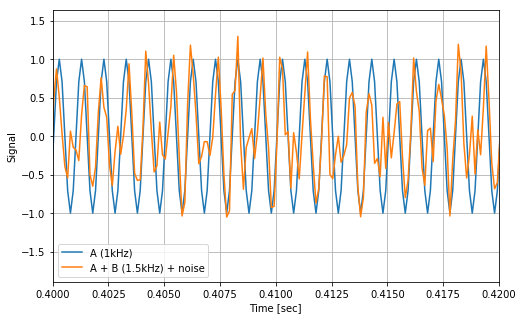

In [23]:
plt.plot(x, array([A,B]).T)
plt.xlim(0.4, 0.42)
plt.grid()
plt.xlabel("Time [sec]")
plt.ylabel("Signal")
plt.legend(["A (1kHz)", "A + B (1.5kHz) + noise"], loc = "best");

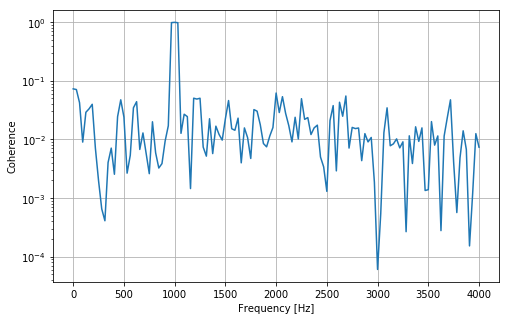

In [24]:
plt.semilogy(f,c)
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Coherence");

- Phase Slope Index (PSI) - by Nolte et al. (2008) :
$$
\tilde{\Psi}_{ij} = \Im \left( \sum_f C_{ij}^* \left( f \right) C_{ij} \left( f + \delta f \right)\right)
$$

In [ ]:
mne.

# <center> References </center>

- Bastos, André M., and Jan-Mathijs Schoffelen. "A tutorial review of functional connectivity analysis methods and their interpretational pitfalls." Frontiers in systems neuroscience 9 (2016): 175.
- P. Wollstadt, J. T. Lizier, R. Vicente, C. Finn, M. Martinez-Zarzuela, P. Mediano, L. Novelli, M. Wibral (2018). IDTxl: The Information Dynamics Toolkit xl: a Python package for the efficient analysis of multivariate information dynamics in networks. ArXiv preprint: https://arxiv.org/abs/1807.10459.
- Lee, Uncheol & Ku, Seungwoo & Noh, Gyujeong & Baek, Seunghye & Choi, Byung-Moon & Mashour, George. (2013). Disruption of Frontal-Parietal Communication by Ketamine, Propofol, and Sevoflurane. Anesthesiology. 118. 1264-1275. 10.1097/ALN.0b013e31829103f5. 
- Nolte, Guido, et al. "Comparison of granger causality and phase slope index." Causality: Objectives and Assessment. 2010.

In [91]:
idtxl.multivariate_te

AttributeError: 'module' object has no attribute 'multivariate_te'